In [1]:
import os,re
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.optimize import least_squares

In [2]:
bound_complex= np.array([7,8,12,13,14,25])-1
def Reading_log_file(log_file,t):
    bound_complex_time = []
    with open(log_file, "r") as file:
        capture = False  # Flag to start capturing data
        for line in file:
            if "Loop time" in line:
                break  # Stop reading when "Loop time" is encountered
            if "Time" in line and "Naccept" in line and "Nreject" in line:
                capture = True  # Start capturing from this line onwards
                continue  # Skip header line
            if capture:
                values = re.split(r'\s+', line.strip())  # Split line into values
                int_data = list(map(lambda x: int(float(x)), values))
                init_data = np.array(int_data[6:])
                sublist = np.array([init_data[i] for i in bound_complex])
                bound_complex_time.append(sublist.sum())
    return bound_complex_time[t]
def species_dist(folder_path,t):
    bound_complex_time = []
    for i in range(1000):
        file_path = f'{folder_path}/Out_files/log.spparks_{i}'
        bound_complex_time.append(Reading_log_file(file_path,t))
    return np.array(bound_complex_time)

In [3]:
Ulbps = [10,15,20,25,35,40,50,100,150,200,300,400]
current_path = os.getcwd()
Kp_condns = ['Kp_Both','No_Kp_Inh','No_Kp_Act','No_Kp']
clus_conds = ['Disjoint','Homogeneous','Overlap']
HLA_condns = ['Low_HLA','High_HLA']
at_time_avg_bound_complex = []
for t in [20,40,60]:
    avg_bound_complex = []
    for ulbp in Ulbps:
        file_path = f'{current_path}/{Kp_condns[0]}/{clus_conds[0]}/{HLA_condns[0]}/Ulbp_{ulbp}'
        bound_complex_time = species_dist(file_path,t)
        avg_bound_complex.append(bound_complex_time.mean())
    at_time_avg_bound_complex.append(avg_bound_complex)

saeed


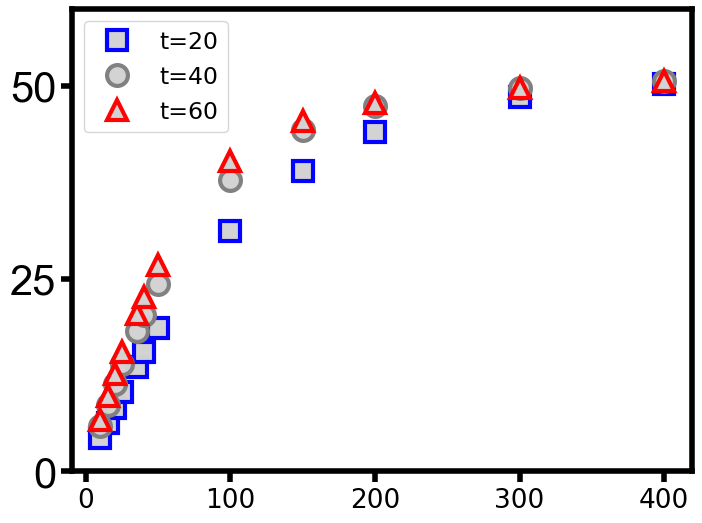

In [8]:
plt.figure(figsize=(8,6))
plt.rcParams['axes.linewidth'] = 4
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=19, length=8, width=4)
lss = [(0,(1,0)),(0, (1, 0)), (0,(1,0)), (0, (3, 1, 1, 1))]
m_size = 15
lw = 4.0
markers = ['s','o','^','<']
colors = ['blue','gray','red','black']
times = [20,40,60]
def Plotting(ARL,mean_pVav,marker,ls,color,cond):
    plt.errorbar(
        ARL, mean_pVav,
        fmt=marker, markersize=m_size, markerfacecolor='lightgray',
        markeredgewidth=3.0, markeredgecolor=color,
        elinewidth=3.5, capsize=10, capthick=20,
        ecolor=color, alpha=0.99, 
        color=color, label=cond)
for i in range(3):
    Plotting(Ulbps,np.array(at_time_avg_bound_complex[i]),markers[i],lss[0],colors[i],cond = f't={times[i]}')
t_size =30
#plt.xticks([0,10,20,30,40],fontname="Arial",fontsize = t_size)
plt.yticks([0.0,25.0,50.0],fontname="Arial",fontsize = t_size)
plt.ylim(0.0,60.0)
plt.legend(bbox_to_anchor=(0.0, 1),fontsize=17, loc='upper left')
plt.savefig('Disjoint_Low_HLA_mean_Act_Complex_vs_NKGL.png')
plt.show()
